In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy as cp

In [4]:
cities = []

for coordinate in lat_lngs:
    city = cp.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

758

In [5]:
cities

['east london',
 'cidreira',
 'busselton',
 'san patricio',
 'kavieng',
 'yellowknife',
 'marsh harbour',
 'mataura',
 'kapoeta',
 'upernavik',
 'tasiilaq',
 'sao domingos',
 'husavik',
 'bluff',
 'kruisfontein',
 'grindavik',
 'punta arenas',
 'ushuaia',
 'manono',
 'okhotsk',
 'nuuk',
 'timizart',
 'castro',
 'qaanaaq',
 'valparaiso',
 'puerto ayora',
 'sioux lookout',
 'port alfred',
 'fort nelson',
 'arraial do cabo',
 'mahebourg',
 'atar',
 'capao da canoa',
 'albany',
 'cape town',
 'barentsburg',
 'mar del plata',
 'maceio',
 'rikitea',
 'cherskiy',
 'casa grande',
 'biak',
 'roma',
 'kabansk',
 'nizhneyansk',
 'belushya guba',
 'laibin',
 'dingle',
 'sentyabrskiy',
 'mehamn',
 'quatre cocos',
 'alice springs',
 'tuktoyaktuk',
 'hermanus',
 'bud',
 'praia da vitoria',
 'makakilo city',
 'saleaula',
 'kamenskoye',
 'teya',
 'bethel',
 'sanandaj',
 'sao gabriel da cachoeira',
 'sitka',
 'zhoucheng',
 'faanui',
 'weligama',
 'new norfolk',
 'dzilam gonzalez',
 'grand forks',
 'kakc

In [6]:
import requests
requests.__version__

'2.27.1'

In [7]:
from weather_module import api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# print(url)

In [9]:
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | marsh harbour
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | kapoeta
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | sao domingos
Processing Record 13 of Set 1 | husavik
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | grindavik
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | manono
Processing Record 20 of Set 1 | okhotsk
Processing Record 21 of Set 1 | nuuk
Processing Record 22 of Set 1 | timizart
Processing Record 23 of Set 1 | 

Processing Record 36 of Set 4 | kulu
Processing Record 37 of Set 4 | petawawa
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | omboue
Processing Record 40 of Set 4 | tanggu
Processing Record 41 of Set 4 | dunedin
Processing Record 42 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 43 of Set 4 | taltal
Processing Record 44 of Set 4 | sorgun
Processing Record 45 of Set 4 | wainwright
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | tamale
Processing Record 48 of Set 4 | norwood
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | mayumba
Processing Record 1 of Set 5 | kaeo
Processing Record 2 of Set 5 | inta
Processing Record 3 of Set 5 | saint anthony
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | laguna
Processing Record 6 of Set 5 | rostaq
City not found. Skipping...
Processing Record 7 of Set 5 | thunder bay
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of

Processing Record 24 of Set 8 | akdepe
Processing Record 25 of Set 8 | muros
Processing Record 26 of Set 8 | camana
Processing Record 27 of Set 8 | mgandu
Processing Record 28 of Set 8 | chapais
Processing Record 29 of Set 8 | hirara
Processing Record 30 of Set 8 | kapit
Processing Record 31 of Set 8 | biltine
Processing Record 32 of Set 8 | homer
Processing Record 33 of Set 8 | chara
Processing Record 34 of Set 8 | waddan
Processing Record 35 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 36 of Set 8 | halalo
City not found. Skipping...
Processing Record 37 of Set 8 | sofia
Processing Record 38 of Set 8 | nanortalik
Processing Record 39 of Set 8 | yangambi
Processing Record 40 of Set 8 | severo-kurilsk
Processing Record 41 of Set 8 | isetskoye
Processing Record 42 of Set 8 | aitape
Processing Record 43 of Set 8 | stephenville crossing
Processing Record 44 of Set 8 | mucurapo
Processing Record 45 of Set 8 | bougouni
Processing Record 46 of Set 8 | taksimo
Processing 

Processing Record 15 of Set 12 | hay river
Processing Record 16 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 17 of Set 12 | cantavir
Processing Record 18 of Set 12 | dogondoutchi
Processing Record 19 of Set 12 | mahalingpur
Processing Record 20 of Set 12 | nioro
Processing Record 21 of Set 12 | patea
Processing Record 22 of Set 12 | esperance
Processing Record 23 of Set 12 | navodari
Processing Record 24 of Set 12 | karpuninskiy
City not found. Skipping...
Processing Record 25 of Set 12 | huicungo
Processing Record 26 of Set 12 | port hardy
Processing Record 27 of Set 12 | alta floresta
Processing Record 28 of Set 12 | yerbogachen
Processing Record 29 of Set 12 | terre-de-bas
Processing Record 30 of Set 12 | ntcheu
Processing Record 31 of Set 12 | roblin
Processing Record 32 of Set 12 | halifax
Processing Record 33 of Set 12 | tessalit
Processing Record 34 of Set 12 | enshi
Processing Record 35 of Set 12 | ryotsu
Processing Record 36 of Set 12 | qaqortoq
Process

Processing Record 50 of Set 15 | luwuk
Processing Record 1 of Set 16 | nchelenge
Processing Record 2 of Set 16 | gibara
Processing Record 3 of Set 16 | formosa do rio preto
Processing Record 4 of Set 16 | sarkand
Processing Record 5 of Set 16 | rusape
Processing Record 6 of Set 16 | toumodi
Processing Record 7 of Set 16 | russell
Processing Record 8 of Set 16 | tara
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# moving cities to dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(21)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,74.34,73,40,5.75,ZA,2022-12-19 15:43:53
1,Cidreira,-30.1811,-50.2056,70.12,80,100,16.28,BR,2022-12-19 15:43:53
2,Busselton,-33.6500,115.3333,71.06,52,44,12.75,AU,2022-12-19 15:43:54
3,San Patricio,28.0170,-97.5169,62.83,95,100,11.72,US,2022-12-19 15:43:54
4,Kavieng,-2.5744,150.7967,79.86,79,100,2.51,PG,2022-12-19 15:43:55
5,Yellowknife,62.4560,-114.3525,-21.48,76,75,5.75,CA,2022-12-19 15:43:28
6,Marsh Harbour,26.5412,-77.0636,71.28,69,94,16.71,BS,2022-12-19 15:43:55
7,Mataura,-46.1927,168.8643,45.93,91,76,0.89,NZ,2022-12-19 15:43:55
8,Kapoeta,4.7717,33.5903,90.73,16,62,11.72,SS,2022-12-19 15:43:56
9,Upernavik,72.7868,-56.1549,26.65,63,100,7.85,GL,2022-12-19 15:43:56


In [14]:
# changing column order
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-12-19 15:43:53,-33.0153,27.9116,74.34,73,40,5.75
1,Cidreira,BR,2022-12-19 15:43:53,-30.1811,-50.2056,70.12,80,100,16.28
2,Busselton,AU,2022-12-19 15:43:54,-33.6500,115.3333,71.06,52,44,12.75
3,San Patricio,US,2022-12-19 15:43:54,28.0170,-97.5169,62.83,95,100,11.72
4,Kavieng,PG,2022-12-19 15:43:55,-2.5744,150.7967,79.86,79,100,2.51
...,...,...,...,...,...,...,...,...,...
692,Sarkand,KZ,2022-12-19 16:03:07,45.4100,79.9186,21.76,66,5,6.80
693,Rusape,ZW,2022-12-19 16:03:08,-18.5278,32.1284,67.10,85,99,0.63
694,Toumodi,CI,2022-12-19 16:03:08,6.5613,-5.0158,95.27,19,28,5.03
695,Russell,US,2022-12-19 16:01:27,32.3502,-85.1999,45.97,40,40,5.10


In [26]:
# saving to csv

output_data_file = "C:\\Users\kelle\Desktop\Bootcamp\World_Weather_Analysis\Module\Cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
import time

# get seconds from today's date
today = time.time()
today

1671468020.0672784

In [30]:
today = time.strftime("%x")
today

'12/19/22'

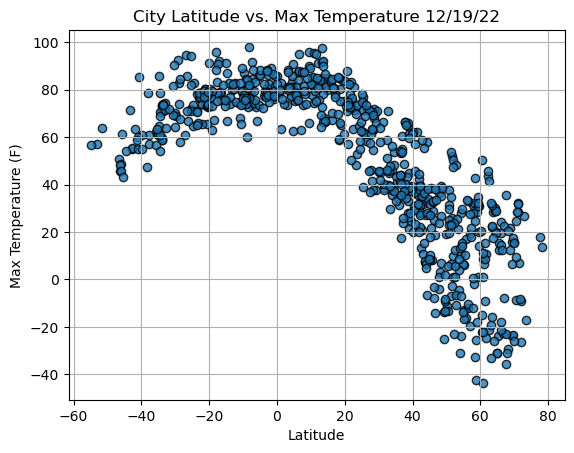

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:\\Users\kelle\Desktop\Bootcamp\World_Weather_Analysis\Module\Images\Max_Temp.png")

# Show plot.
plt.show()

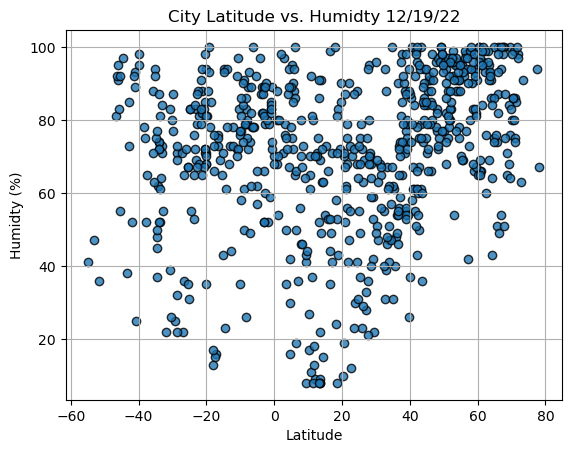

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidty "+ time.strftime("%x"))
plt.ylabel("Humidty (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:\\Users\kelle\Desktop\Bootcamp\World_Weather_Analysis\Module\Images\Humidty.png")

# Show plot.
plt.show()

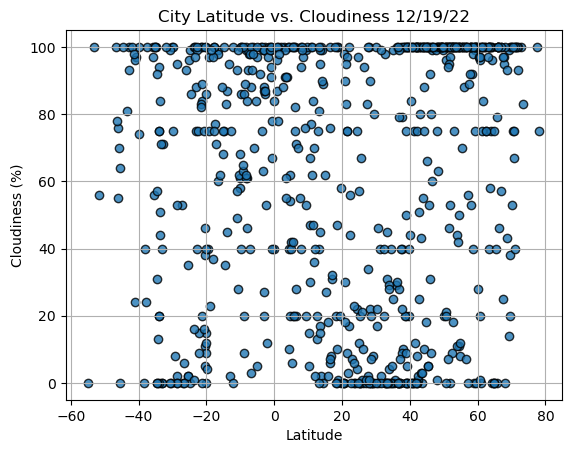

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:\\Users\kelle\Desktop\Bootcamp\World_Weather_Analysis\Module\Images\Cloudiness.png")

# Show plot.
plt.show()

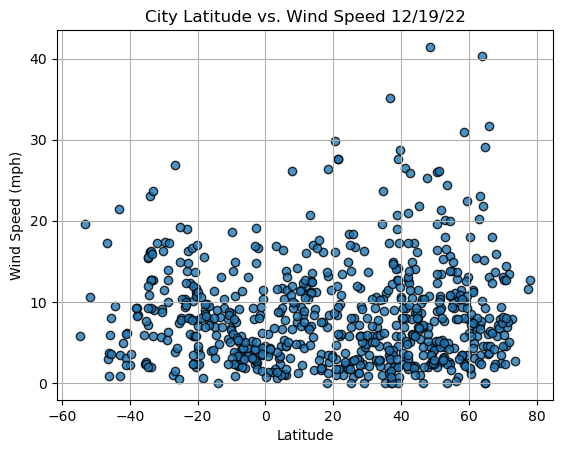

In [60]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:\\Users\kelle\Desktop\Bootcamp\World_Weather_Analysis\Module\Images\Wind_Speed.png")

# Show plot.
plt.show()

In [61]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [62]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [63]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [64]:
linregress(lats, temps)

LinregressResult(slope=-0.452929121241496, intercept=92.93922548147363, rvalue=-0.7590444753769936, pvalue=0.01089687086168761, stderr=0.13734880392044935, intercept_stderr=6.372784691788096)

In [65]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

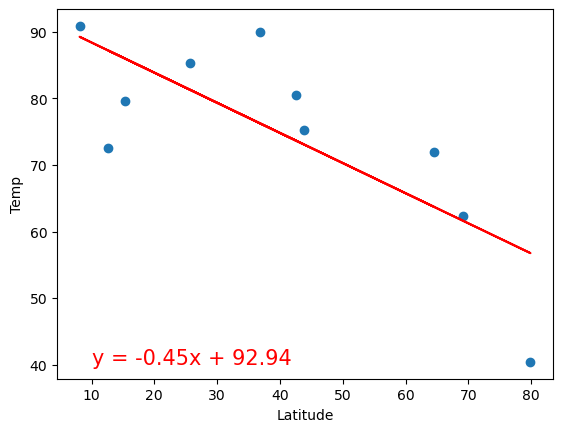

In [66]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [68]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [69]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,San Patricio,US,2022-12-19 15:43:54,28.0170,-97.5169,62.83,95,100,11.72
5,Yellowknife,CA,2022-12-19 15:43:28,62.4560,-114.3525,-21.48,76,75,5.75
6,Marsh Harbour,BS,2022-12-19 15:43:55,26.5412,-77.0636,71.28,69,94,16.71
8,Kapoeta,SS,2022-12-19 15:43:56,4.7717,33.5903,90.73,16,62,11.72
9,Upernavik,GL,2022-12-19 15:43:56,72.7868,-56.1549,26.65,63,100,7.85
...,...,...,...,...,...,...,...,...,...
690,Gibara,CU,2022-12-19 16:03:06,21.1097,-76.1317,82.62,61,95,11.90
692,Sarkand,KZ,2022-12-19 16:03:07,45.4100,79.9186,21.76,66,5,6.80
694,Toumodi,CI,2022-12-19 16:03:08,6.5613,-5.0158,95.27,19,28,5.03
695,Russell,US,2022-12-19 16:01:27,32.3502,-85.1999,45.97,40,40,5.10


In [70]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

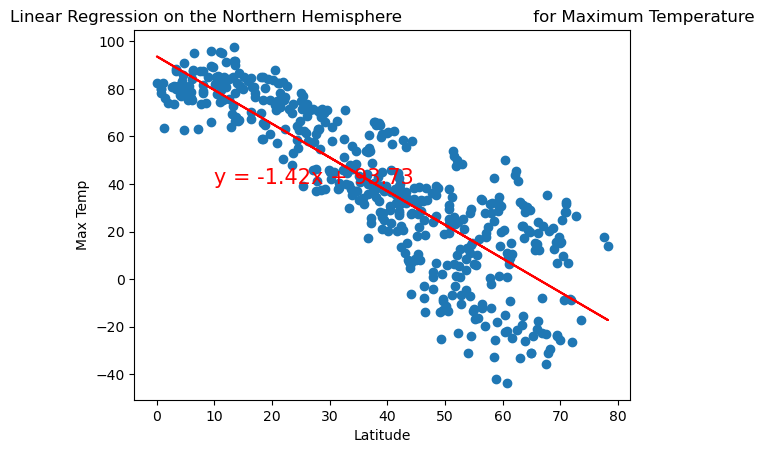

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

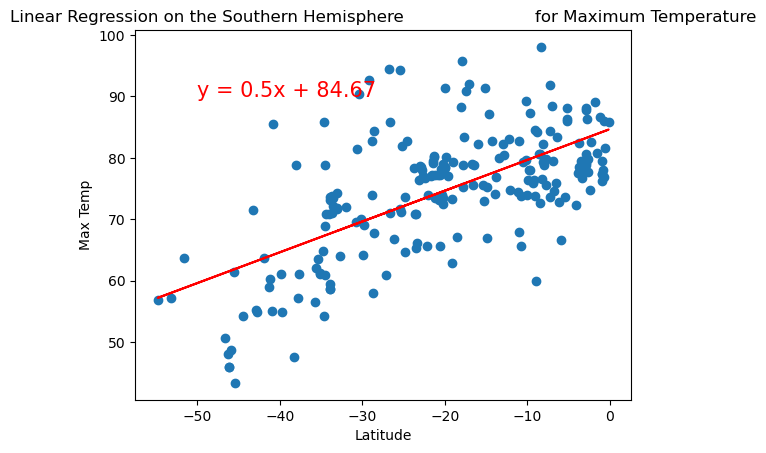

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))